In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [4]:
del df['Product_Category_2']
del df['Product_Category_3']

In [7]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [8]:
df.isnull().sum() 

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

### total rows are 537577, but that does not mean that thereare total this many users. Because a single user has purchased multiple products does multiple entry exists.

In [9]:
df['User_ID'].nunique()

5891

In [10]:
df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [11]:
df['Product_ID'].nunique()

3623

In [12]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [13]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
df['Occupation'].nunique()

21

In [15]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [16]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [17]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [18]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [19]:
df['Purchase'].sum()/len(df['Purchase'])   # average purchase 

9333.859852635065

In [20]:
for i in df.columns:
    print( df[i].nunique(),"\t:",i)

5891 	: User_ID
3623 	: Product_ID
2 	: Gender
7 	: Age
21 	: Occupation
3 	: City_Category
5 	: Stay_In_Current_City_Years
2 	: Marital_Status
18 	: Product_Category_1
17959 	: Purchase


In [21]:
df[df['Gender'] == 'M'] 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [22]:
data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M'] ), len(df[df['Gender'] == 'F'] )]}, index = ['Male','Female'])


<Axes: ylabel='Ratio'>

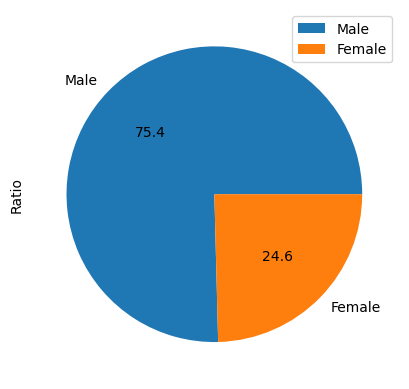

In [23]:
data.plot.pie (y = 'Ratio', autopct="%.1f")

<Axes: title={'center': 'Gender Ratio'}>

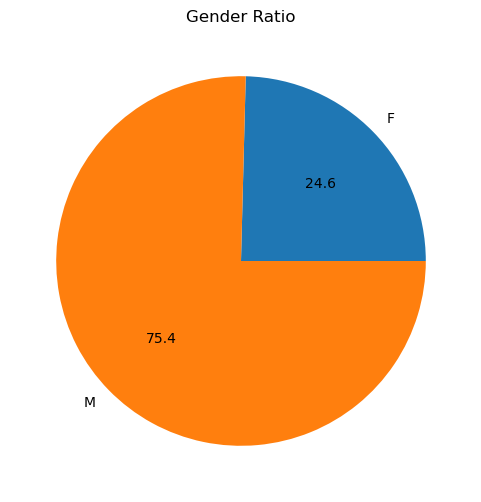

In [24]:
df.groupby('Gender').size().plot(kind = 'pie', 
                                autopct = "%.1f",
                                title = 'Gender Ratio',
                                figsize = (6,6))

<Axes: title={'center': 'Gender Ratio'}, xlabel='Gender'>

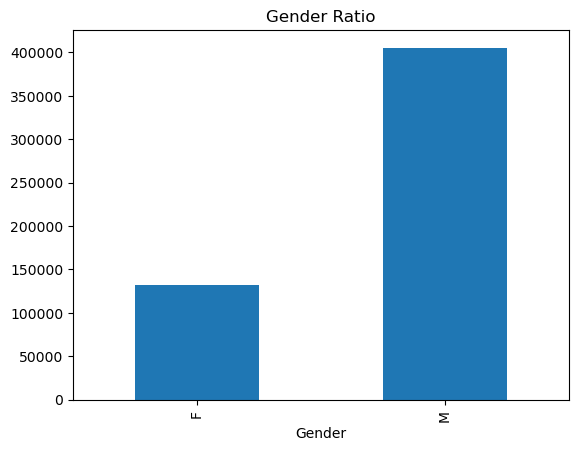

In [25]:
df.groupby('Gender').size().plot(kind = 'bar',
                                title = 'Gender Ratio')

<Axes: ylabel='Purchase'>

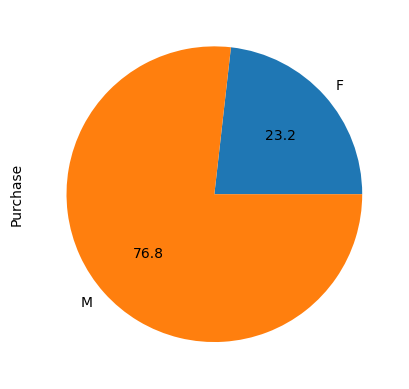

In [26]:
df.groupby('Gender').sum()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

<Axes: title={'center': 'Purchase Distribution by age'}, xlabel='Age'>

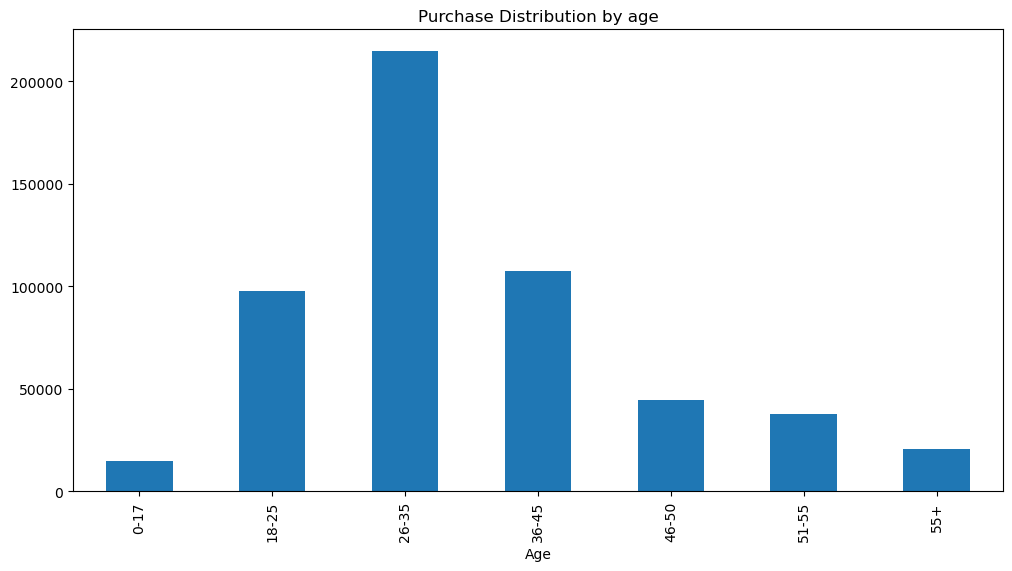

In [27]:
df.groupby('Age').size().plot(kind = 'bar',figsize=(12,6), title = 'Purchase Distribution by age')

In [28]:
lst=[]
for i in df['Age'].unique():
    lst.append([i,df[df['Age'] == i]['Product_ID'].nunique()])
data = pd.DataFrame (lst, columns = ['Age', 'Products'])
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: xlabel='Age'>

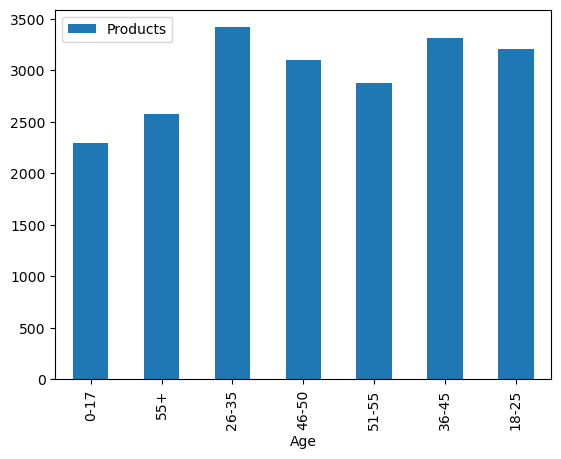

In [29]:
data.plot.bar(x = 'Age')

<Axes: title={'center': 'Amount Spent by Age'}, xlabel='Age'>

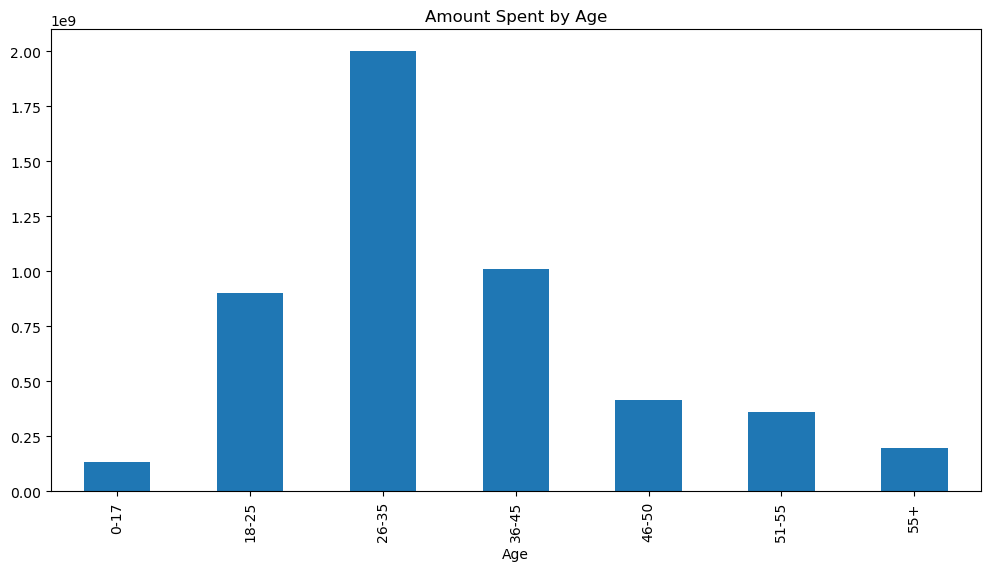

In [30]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar', figsize=(12,6), title = 'Amount Spent by Age')

In [31]:
df.groupby('Age').mean()['Purchase'].plot(kind = 'pie', autopct = '%0.1f')

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
df.groupby('Age').sum()

<Axes: >

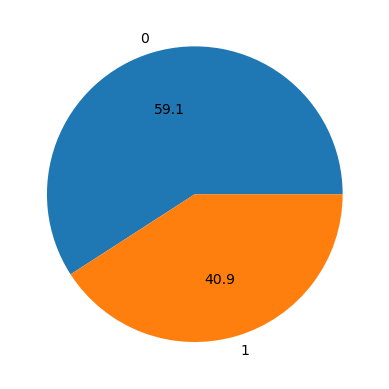

In [32]:
df.groupby('Marital_Status').size().plot(kind = 'pie', autopct = '%0.1f')

<Axes: xlabel='Age', ylabel='count'>

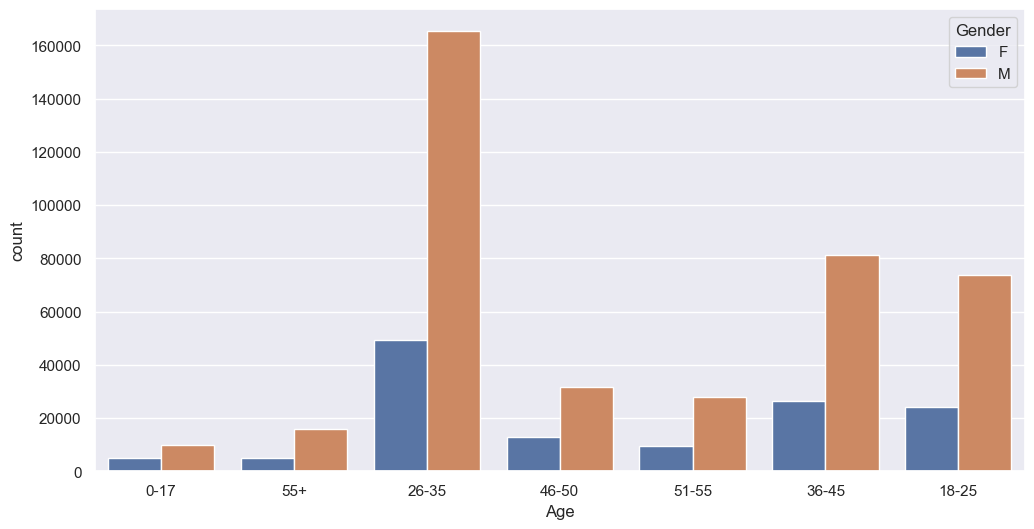

In [33]:
sns.set(rc = {'figure.figsize': (12,6)})
sns.countplot(data=df, x='Age', hue='Gender')

<Axes: xlabel='Gender', ylabel='count'>

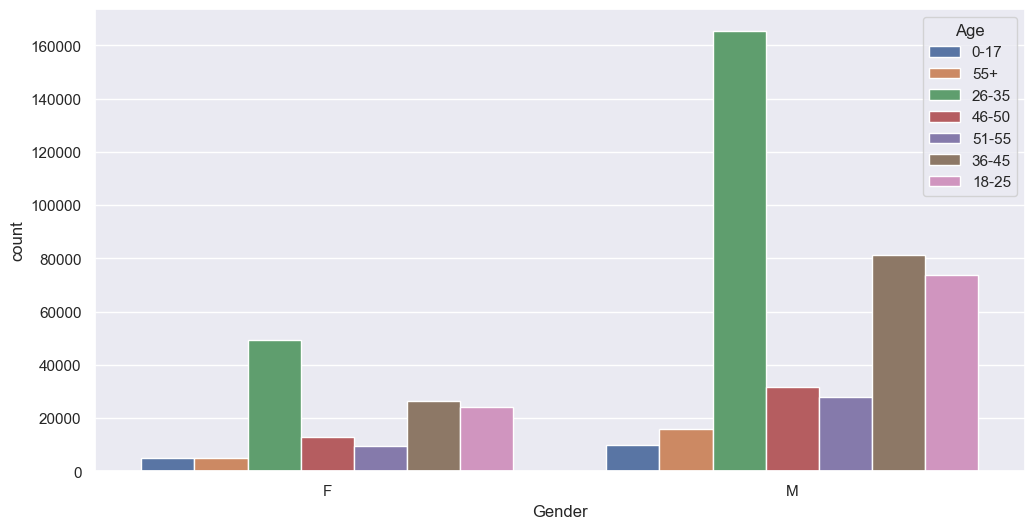

In [34]:
sns.set(rc = {'figure.figsize': (12,6)})
sns.countplot(data=df, x='Gender', hue='Age')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

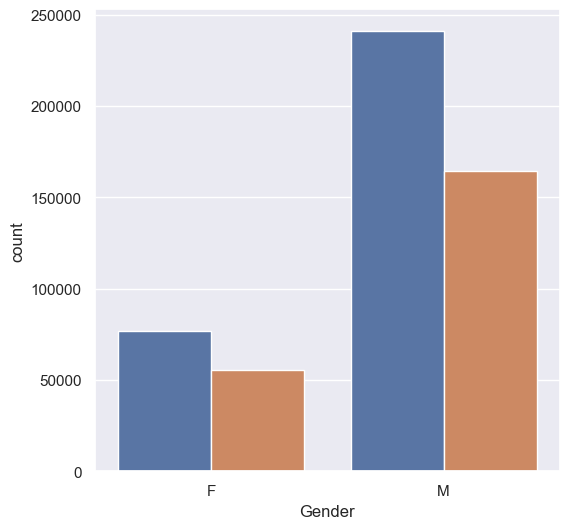

In [35]:
sns.set(rc = {'figure.figsize': (6,6)})
sns.countplot(data=df, x='Gender', hue='Marital_Status')

<Axes: xlabel='Marital_Status', ylabel='count'>

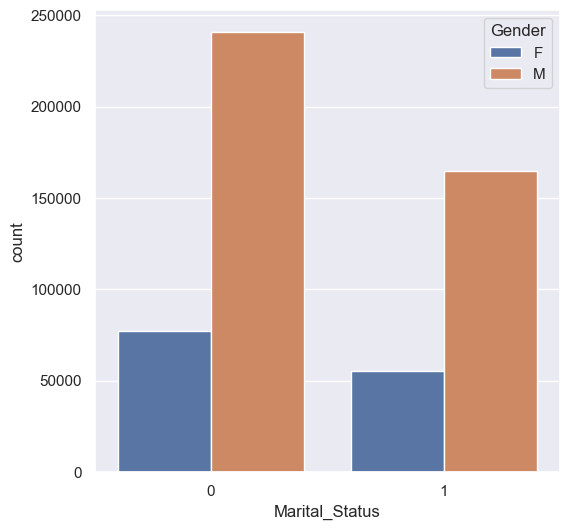

In [36]:
sns.set(rc = {'figure.figsize': (6,6)})
sns.countplot(data=df, x='Marital_Status', hue='Gender')

<Axes: xlabel='City_Category', ylabel='count'>

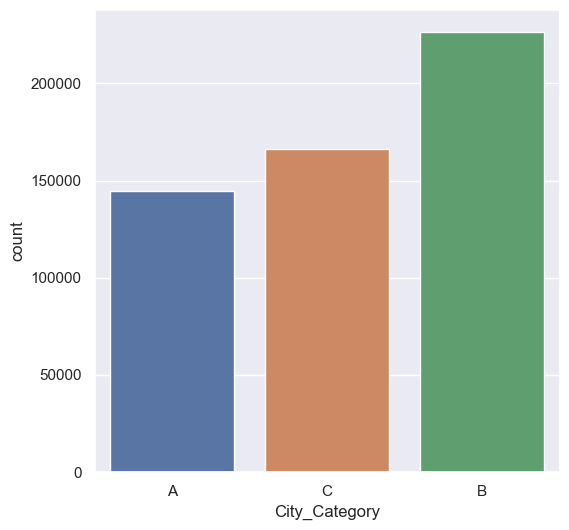

In [37]:
# sns.set(rc = {'figure.figsize': (6,6)})
sns.countplot(data=df, x='City_Category')

<Axes: >

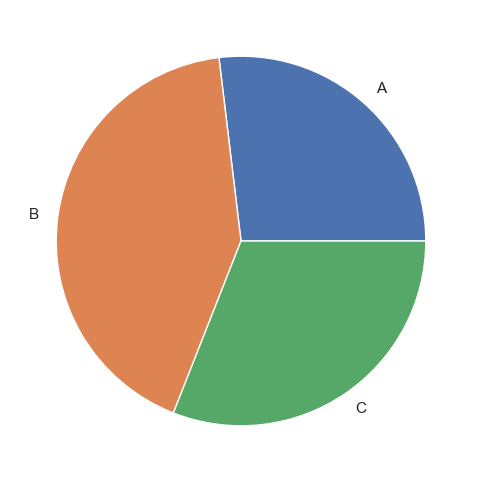

In [38]:
df.groupby('City_Category').size().plot(kind='pie')

<Axes: xlabel='City_Category', ylabel='count'>

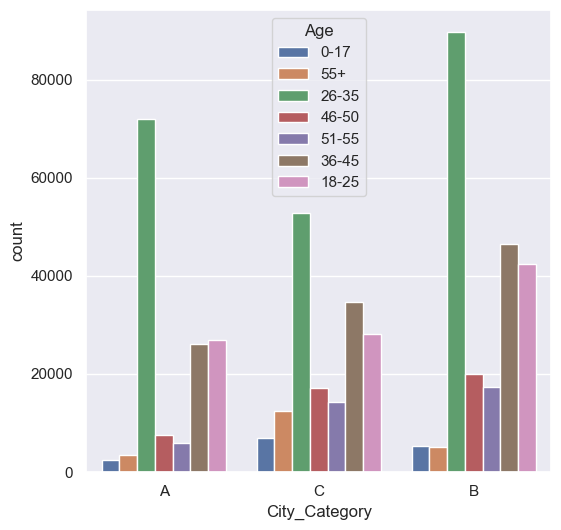

In [39]:
sns.countplot(data = df, x='City_Category', hue='Age')

<Axes: xlabel='Marital_Status', ylabel='count'>

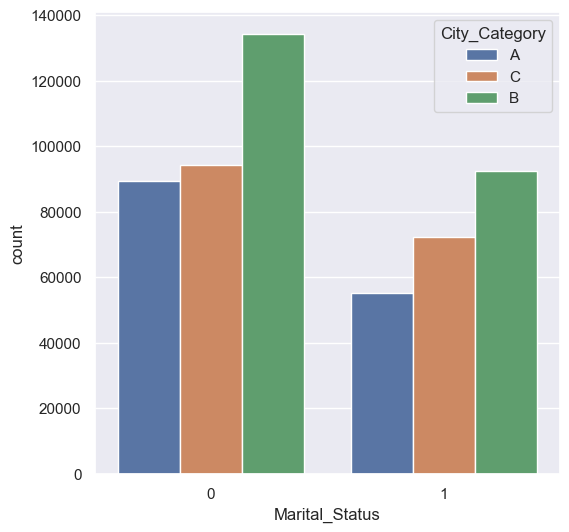

In [40]:
sns.countplot(data = df, x='Marital_Status', hue='City_Category')

<Axes: >

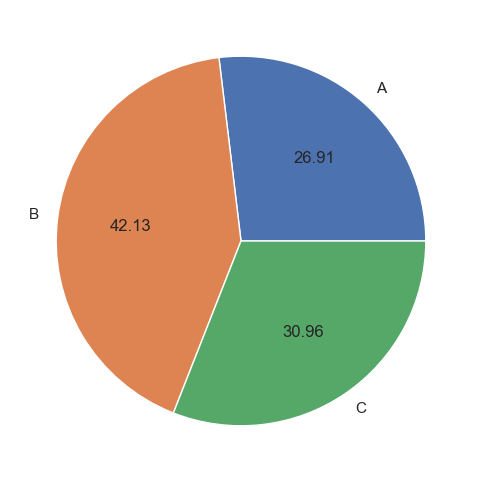

In [42]:
df.groupby('City_Category').size().plot(kind = 'pie',autopct = '%0.2f')

<Axes: xlabel='City_Category', ylabel='count'>

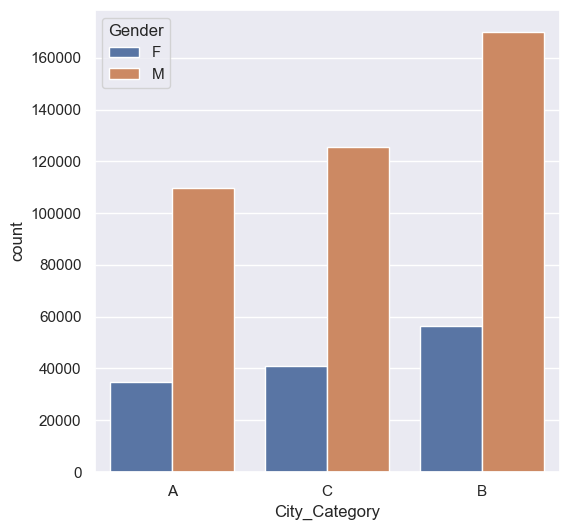

In [43]:
sns.countplot(data=df,x='City_Category', hue='Gender')

<Axes: ylabel='Purchase'>

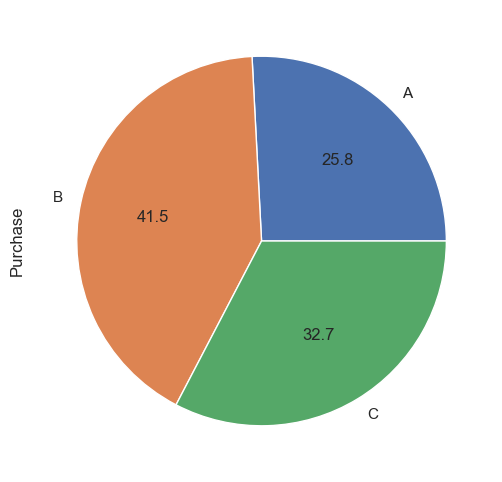

In [44]:
df.groupby('City_Category').sum()['Purchase'].plot(kind='pie', autopct="%.1f")

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

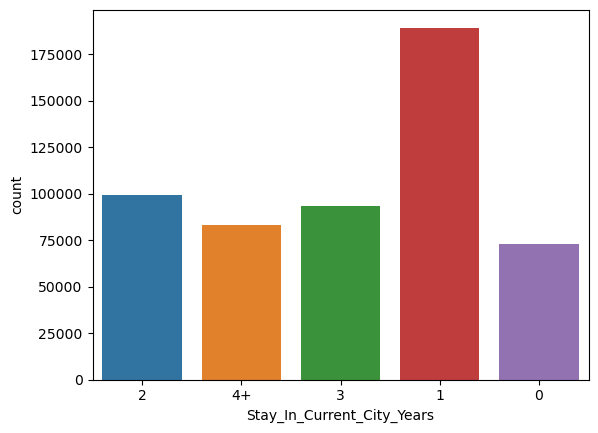

In [6]:
sns.countplot(x=df['Stay_In_Current_City_Years'])

<Axes: >

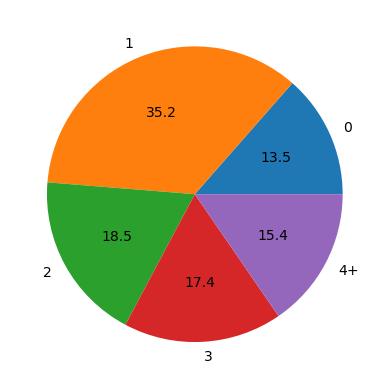

In [12]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind = 'pie', autopct="%.1f")

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

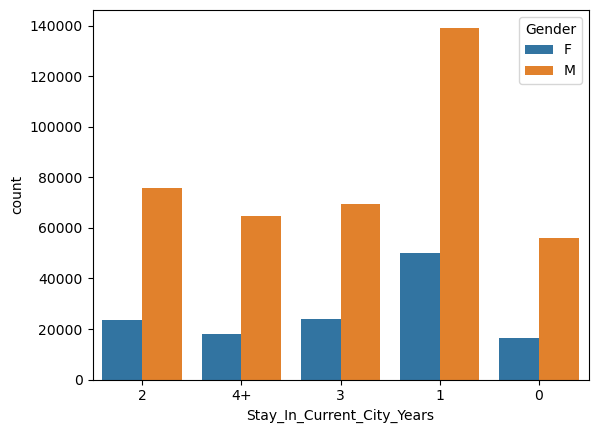

In [7]:
sns.countplot(data = df, x='Stay_In_Current_City_Years', hue='Gender')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

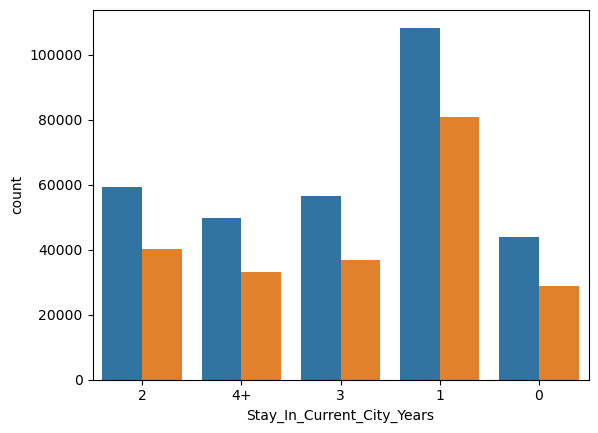

In [8]:
sns.countplot(data = df, x='Stay_In_Current_City_Years', hue='Marital_Status')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

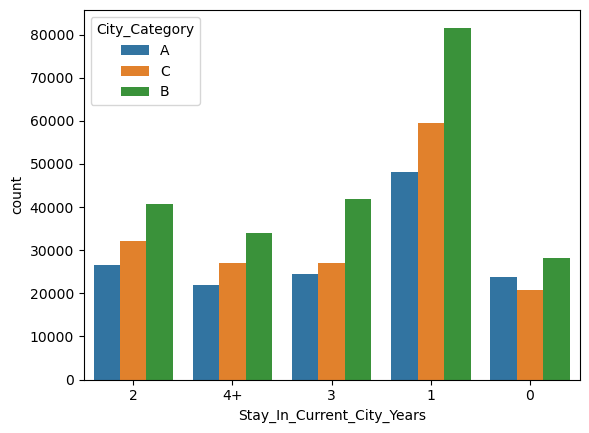

In [9]:
sns.countplot(data = df, x='Stay_In_Current_City_Years', hue='City_Category')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

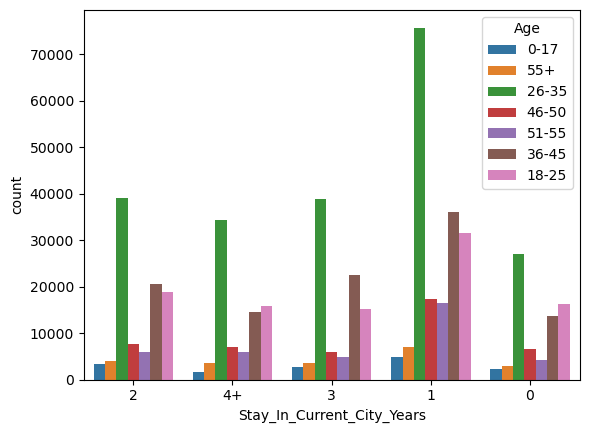

In [10]:
sns.countplot(data = df, x='Stay_In_Current_City_Years', hue='Age')

<Axes: xlabel='City_Category', ylabel='count'>

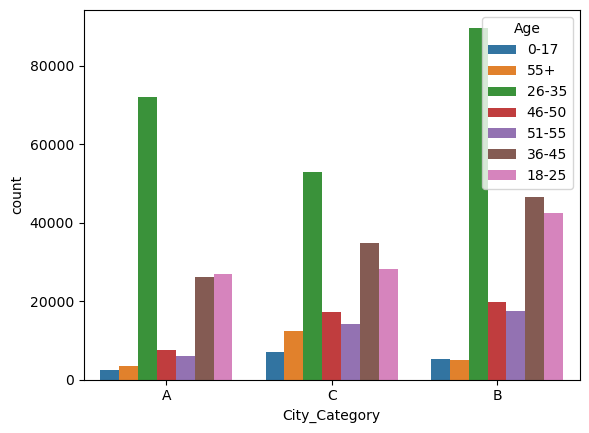

In [11]:
sns.countplot(data = df, x='City_Category', hue='Age')

In [ ]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind = 'pie', autopct="%.1f")

In [ ]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

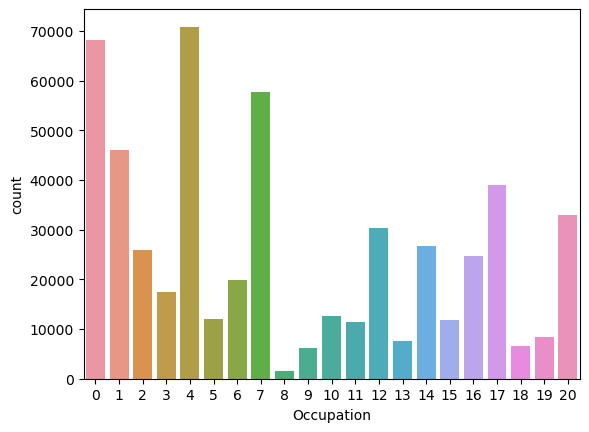

In [15]:
sns.countplot(x = df['Occupation'])

In [16]:
df.groupby('Occupation').size()

Occupation
0     68120
1     45971
2     25845
3     17366
4     70862
5     11985
6     19822
7     57806
8      1524
9      6153
10    12623
11    11338
12    30423
13     7548
14    26712
15    11812
16    24790
17    39090
18     6525
19     8352
20    32910
dtype: int64

<Axes: xlabel='Occupation'>

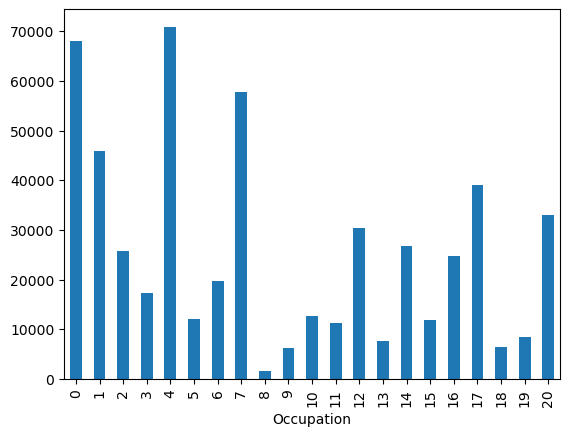

In [14]:
df.groupby('Occupation').size().plot(kind='bar')

<Axes: xlabel='Occupation'>

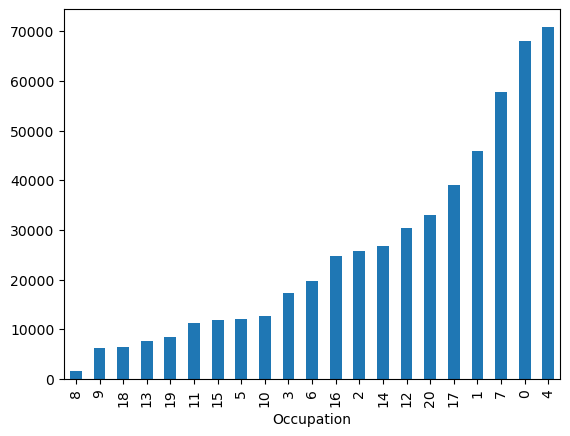

In [17]:
df.groupby('Occupation').size().sort_values().plot(kind='bar')

<Axes: xlabel='Occupation'>

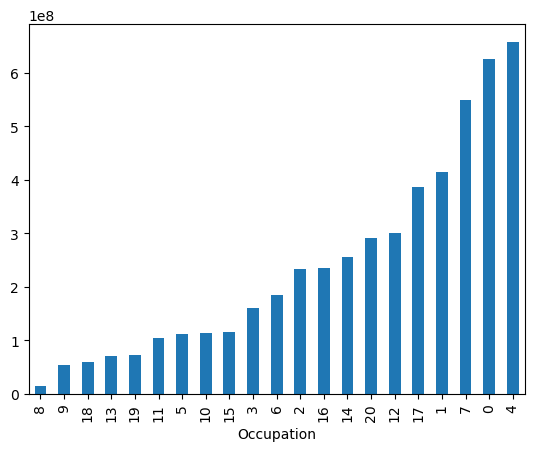

In [20]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind='bar')


In [21]:
df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind='bar')


TypeError: agg function failed [how->mean,dtype->object]

In [22]:
df.groupby('Occupation').mean()['Purchase'].sort_values()

TypeError: agg function failed [how->mean,dtype->object]

AttributeError: 'numpy.int64' object has no attribute 'startswith'

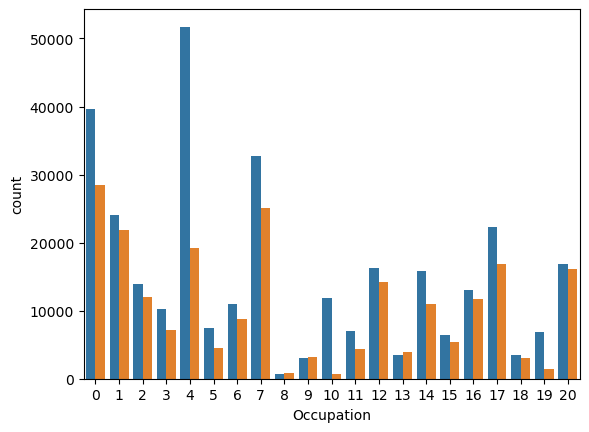

In [23]:
sns.countplot(x = 'Occupation', hue = 'Marital_Status', data=df)

<Axes: xlabel='Occupation', ylabel='count'>

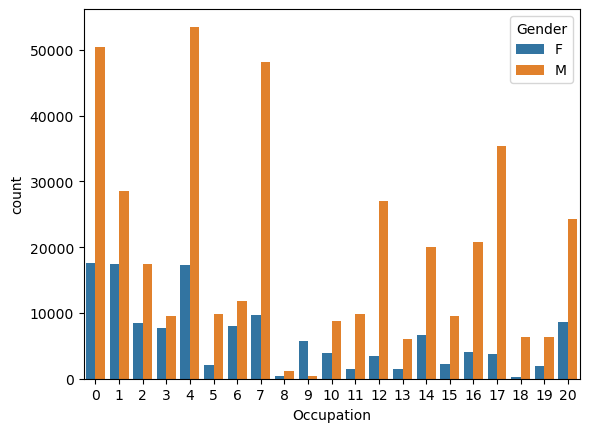

In [24]:
sns.countplot(x = 'Occupation', hue = 'Gender', data=df)

<Axes: xlabel='Occupation'>

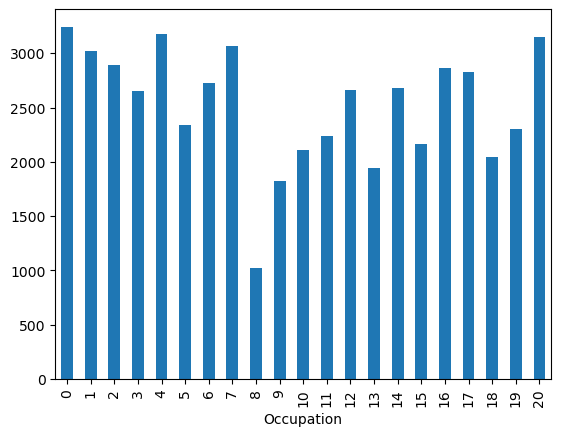

In [26]:
df.groupby('Occupation').nunique()['Product_ID'].plot(kind='bar')

<Axes: xlabel='Occupation'>

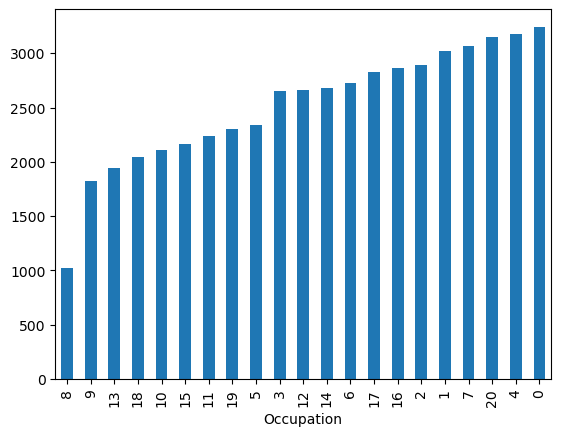

In [27]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

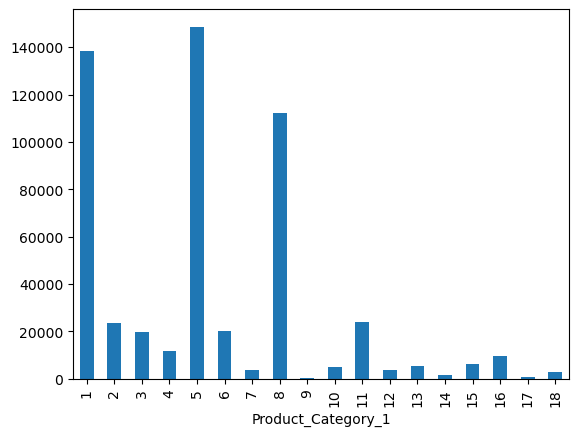

In [30]:
df.groupby('Product_Category_1').size().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

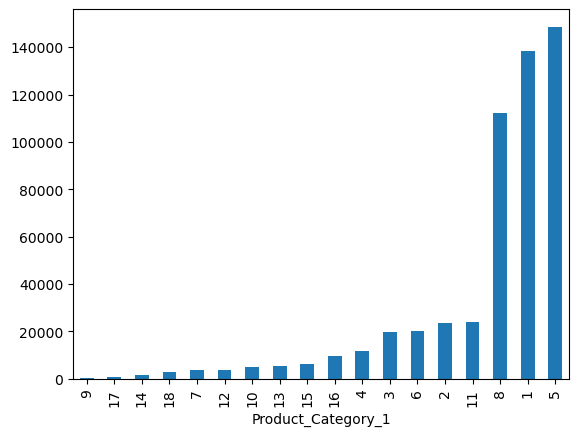

In [31]:
df.groupby('Product_Category_1').size().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

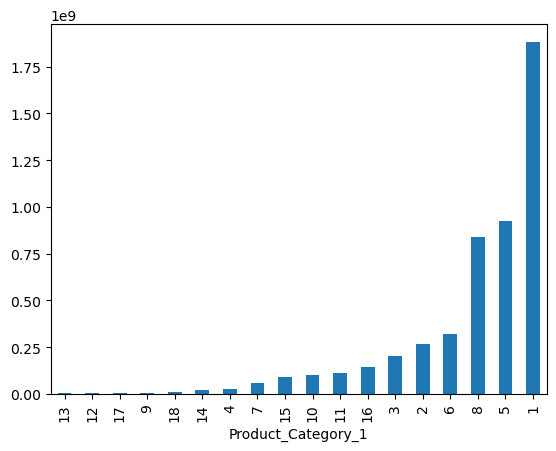

In [33]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind='bar')

In [ ]:
df.groupby('Product_Category_1').sum()['Purchase'].nlargest(10).sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1', ylabel='count'>

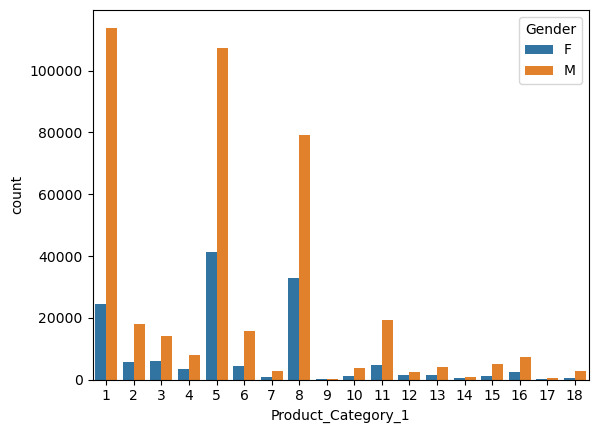

In [35]:
sns.countplot(data = df, x='Product_Category_1', hue='Gender')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

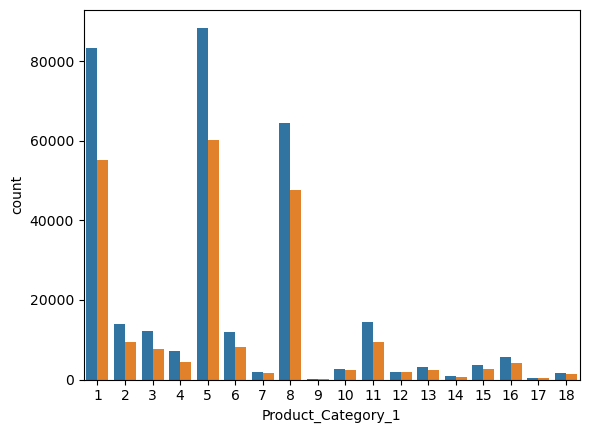

In [36]:
sns.countplot(data = df, x='Product_Category_1', hue='Marital_Status')

In [48]:
l=[]
for i in range(len(df)):
    l.append(df['Gender'][i]+ "_" + str(df['Marital_Status'][i]))

df['Marital_Gender'] = l

In [49]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Marital_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<Axes: xlabel='Marital_Gender', ylabel='count'>

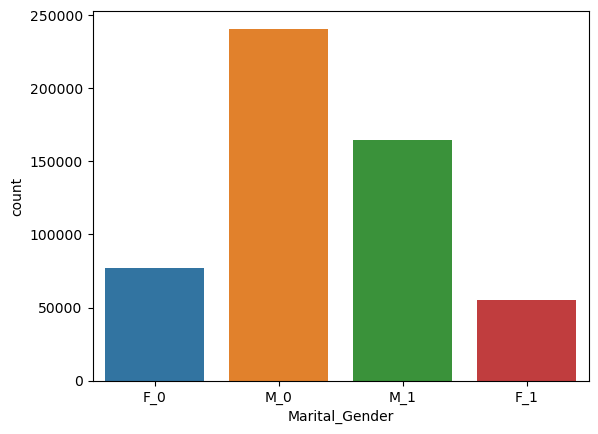

In [50]:
sns.countplot(x=df['Marital_Gender'])

<Axes: xlabel='Age', ylabel='count'>

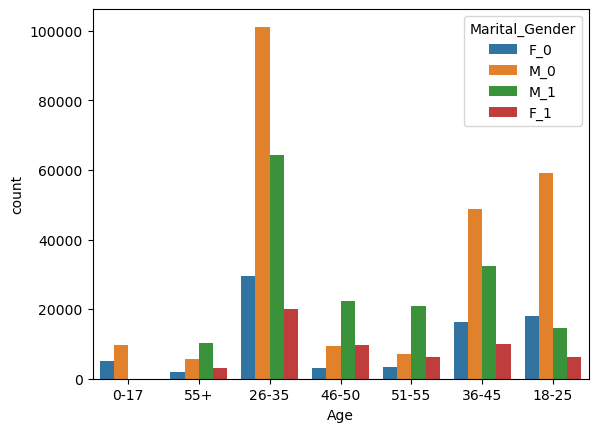

In [53]:
sns.countplot(data=df, x=df['Age'], hue=df['Marital_Gender'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

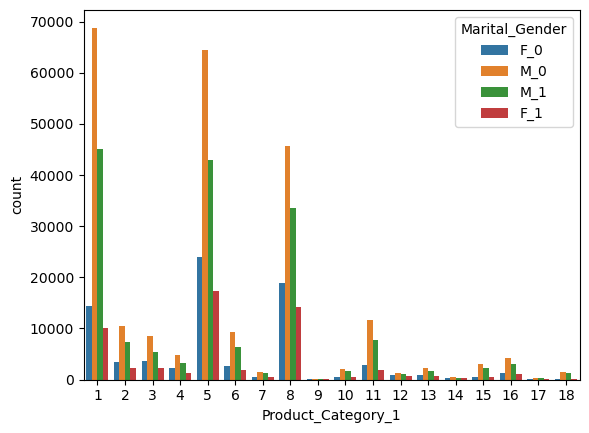

In [54]:
sns.countplot(data=df, x=df['Product_Category_1'], hue=df['Marital_Gender'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

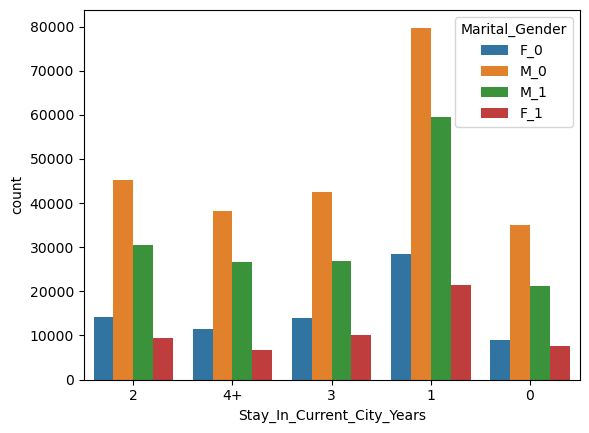

In [58]:
sns.countplot(data=df, x=df['Stay_In_Current_City_Years'],
              hue=df['Marital_Gender'])

<Axes: xlabel='City_Category', ylabel='count'>

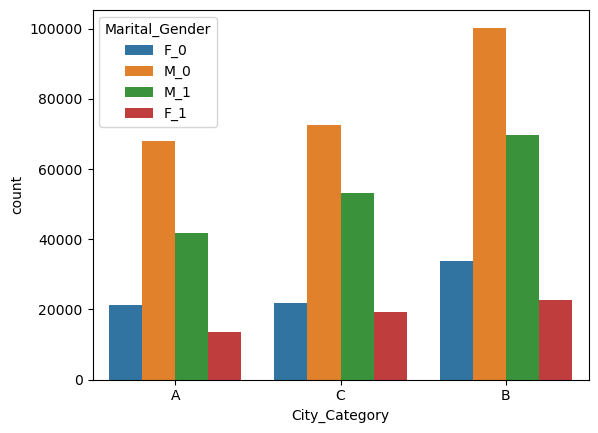

In [59]:
sns.countplot(data=df, x=df['City_Category'], hue=df['Marital_Gender'])